In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import keras
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,mean_squared_error,r2_score

In [50]:
pd.set_option('display.max_columns',None)
data = pd.read_excel('sample_data.xlsx')

In [51]:
data

,Payroll Date,Count,PID,Install Partner,Customer Name,Sales Rep,kW,Cancel,Approved,M1,M2,State,Product,Gross Account value,EPC,Net EPC,Dealer Fee %,Dealer Fee $,SOW $,Redline,Total $ For Acct,Prev $ Paid,Last Date Pd,M1 $ This Week,Install (M2) $ This Week,Prev Deducted $,Cancel Fee,Cancel Deduction,Lead Cost $,ADV Pay Back $,Total $ in Period,Setter,Override 1,Override 2,Override 3,Notes,Rep Redline,Company Margin,Test,Setter Prior Pmts,Closer Prior Pmts,Overrides,Overrides 2,Override 3.1,Setter Payment,Closer Payment,Test.1,Still Due,Test.2,Testing Installer Redline
0,2021-03-17,3,ESG17740,Benjamin Wise,Donna Moody,Prof. Thompson,4.95,NaN,2021-02-19 00:00:00,2021-02-22,NaT,FL,LOAN,19409.23,3.921,2.998,0.2349,4569.23,0,2.2,3950,NaN,NaN,1185,0,NaN,0,0,0,0,1185,Dr. Clark,NaN,NaN,NaN,Splitting with setter,2.40,0.2,0.10,NaN,NaN,NaN,NaN,NaN,495.0,0.00,0,2765.00,0,-0.1
1,2021-04-14,3,ESG17740,Benjamin Wise,Donna Moody,Prof. Thompson,4.95,NaN,2021-02-19 00:00:00,2021-02-22,2021-04-02,FL,LOAN,19409.23,3.921,2.695,0.2349,4569.23,1500,2.2,2450,NaN,NaN,-450,1715,NaN,0,0,0,0,1265,Dr. Clark,NaN,NaN,NaN,Splitting with setter,2.40,0.2,0.25,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0,1185.00,0,-0.1
2,2021-05-19,3,ESG17740,Benjamin Wise,Donna Moody,Prof. Thompson,4.95,NaN,2021-02-19 00:00:00,2021-02-22,2021-04-02,FL,LOAN,19409.23,3.921,2.695,0.2349,4569.23,1500,2.1,2945,2450,2021-04-14 00:00:00,883.5,-388.5,NaN,0,0,0,0,495,Dr. Clark,NaN,NaN,NaN,Splitting with setter,2.30,0.2,0.25,482.63,NaN,NaN,NaN,NaN,0.0,1472.37,0,0.00,0,0.0
3,2021-03-17,3,ESG17780,Benjamin Wise,Paul Brown,Prof. Thompson,9.24,NaN,2021-02-20 00:00:00,2021-02-23,NaT,FL,LOAN,53726.31,5.815,3.127,0.2349,12630.31,12200,2.2,8568,NaN,NaN,2570.4,0,NaN,0,0,0,0,2570.4,NaN,NaN,NaN,NaN,No Split,2.40,0.2,-2.52,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0,5997.60,0,-0.1
4,2021-04-14,3,ESG17780,Benjamin Wise,Paul Brown,Prof. Thompson,9.24,NaN,2021-02-20 00:00:00,2021-02-23,2021-03-30,FL,LOAN,50955.74,5.515,2.898,0.2349,11979.5,12200,2.2,6448.24,NaN,NaN,-635.93,4513.77,NaN,0,0,0,0,3877.84,NaN,NaN,NaN,NaN,No Split,2.40,0.2,1.28,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0,2570.40,0,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,2022-09-30,1,LIS11143,Nicholas Owens,Melissa Sheppard,Mr. Jackson,15.17,NaN,01/00/00,2022-09-12,NaT,CO,Cash,66180,4.363,3.85,-,-,7775.5,2.2,25030.5,-,NaN,7509.15,-,NaN,-,-,-,-,7509.15,Dr. Johnson,NaN,NaN,NaN,NaN,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,17521.35,NaN,NaN
1518,2022-09-30,1,LIS11294,Nicholas Owens,Susan Khan,Mr. Jackson,6.16,NaN,01/00/00,2022-09-12,NaT,CO,Loan,36656.52,5.951,4.3,0.2774,10168.52,-,2.2,12936,-,NaN,3880.8,-,NaN,-,-,-,-,3880.8,Dr. Johnson,NaN,NaN,NaN,NaN,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,616.0,NaN,NaN,9055.20,NaN,NaN
1519,2022-09-30,1,LIS11569,Nicholas Owens,Joshua French,Mr. Jackson,6.60,NaN,01/00/00,2022-09-12,NaT,CO,Loan,42543.22,6.446,4.4,0.3174,13503.22,-,2.2,14520,-,NaN,4356,-,NaN,-,-,-,-,4356,Dr. Johnson,NaN,NaN,NaN,NaN,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.0,NaN,NaN,10164.00,NaN,NaN
1520,2022-09-30,1,LIS11496,Nicholas Owens,Dr. Morgan Robinson,Prof. Davis,5.72,NaN,01/00/00,2022-09-15,NaT,CO,Cash,22308,3.9,3.9,-,-,-,2.2,9724,-,NaN,2917.2,-,NaN,-,-,-,-,2917.2,Mr. Wilson,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572.0,NaN,NaN,6806.80,NaN,NaN


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Payroll Date               1522 non-null   datetime64[ns]
 1   Count                      1522 non-null   int64         
 2   PID                        1522 non-null   object        
 3   Install Partner            1522 non-null   object        
 4   Customer Name              1522 non-null   object        
 5   Sales Rep                  1522 non-null   object        
 6   kW                         1522 non-null   float64       
 7   Cancel                     100 non-null    object        
 8   Approved                   1521 non-null   object        
 9   M1                         1508 non-null   datetime64[ns]
 10  M2                         547 non-null    datetime64[ns]
 11  State                      1522 non-null   object        
 12  Produc

In [53]:
regressor = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)

In [54]:
data['Profit'] = data[' Company Margin'] * data['kW'] * 1000

In [55]:
train = data

In [56]:
train.dropna(subset=['Profit'], inplace=True)
train.reset_index(inplace=True)

In [57]:
train = train.replace('-',0)

In [58]:
train = train.replace(np.nan,0)

In [59]:
train = train.drop(['Payroll Date','PID','Customer Name','Sales Rep','Cancel','Approved','M1','M2','State','Product','Last Date Pd','Setter','Last Date Pd','Override 1','Override 2','Override 3','Notes'],axis=1)

In [60]:
train = train.drop(['Install Partner'],axis=1)

In [82]:
train = train.drop(['ADV Pay Back $','Prev Deducted $','Cancel Deduction'],axis=1)

In [74]:
train = train.replace('  -   ','0')
train['Test.2']=train['Test.2'].astype('float64')
train['ADV Pay Back $']=train['ADV Pay Back $'].astype('float64')
train['Cancel Fee']=train['Cancel Fee'].astype('float64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1116 non-null   int64  
 1   Count                      1116 non-null   int64  
 2   kW                         1116 non-null   float64
 3   Gross Account value        1116 non-null   float64
 4   EPC                        1116 non-null   float64
 5   Net EPC                    1116 non-null   float64
 6   Dealer Fee %               1116 non-null   float64
 7   Dealer Fee $               1116 non-null   float64
 8   SOW $                      1116 non-null   float64
 9   Redline                    1116 non-null   float64
 10  Total $ For Acct           1116 non-null   float64
 11  Prev $ Paid                1116 non-null   float64
 12  M1 $ This Week             1116 non-null   float64
 13  Install (M2) $ This Week   1116 non-null   float

In [83]:
matrix = train.corr()

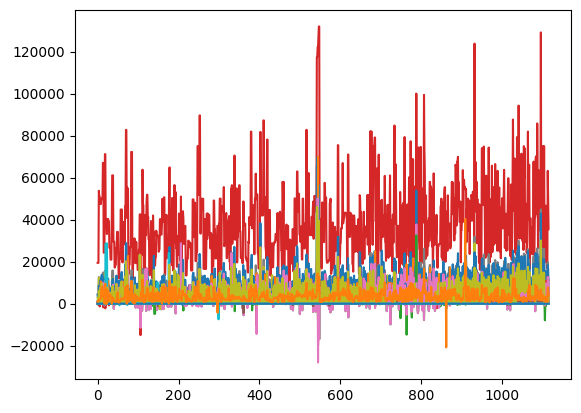

In [84]:
plt.plot(train);

<Axes: >

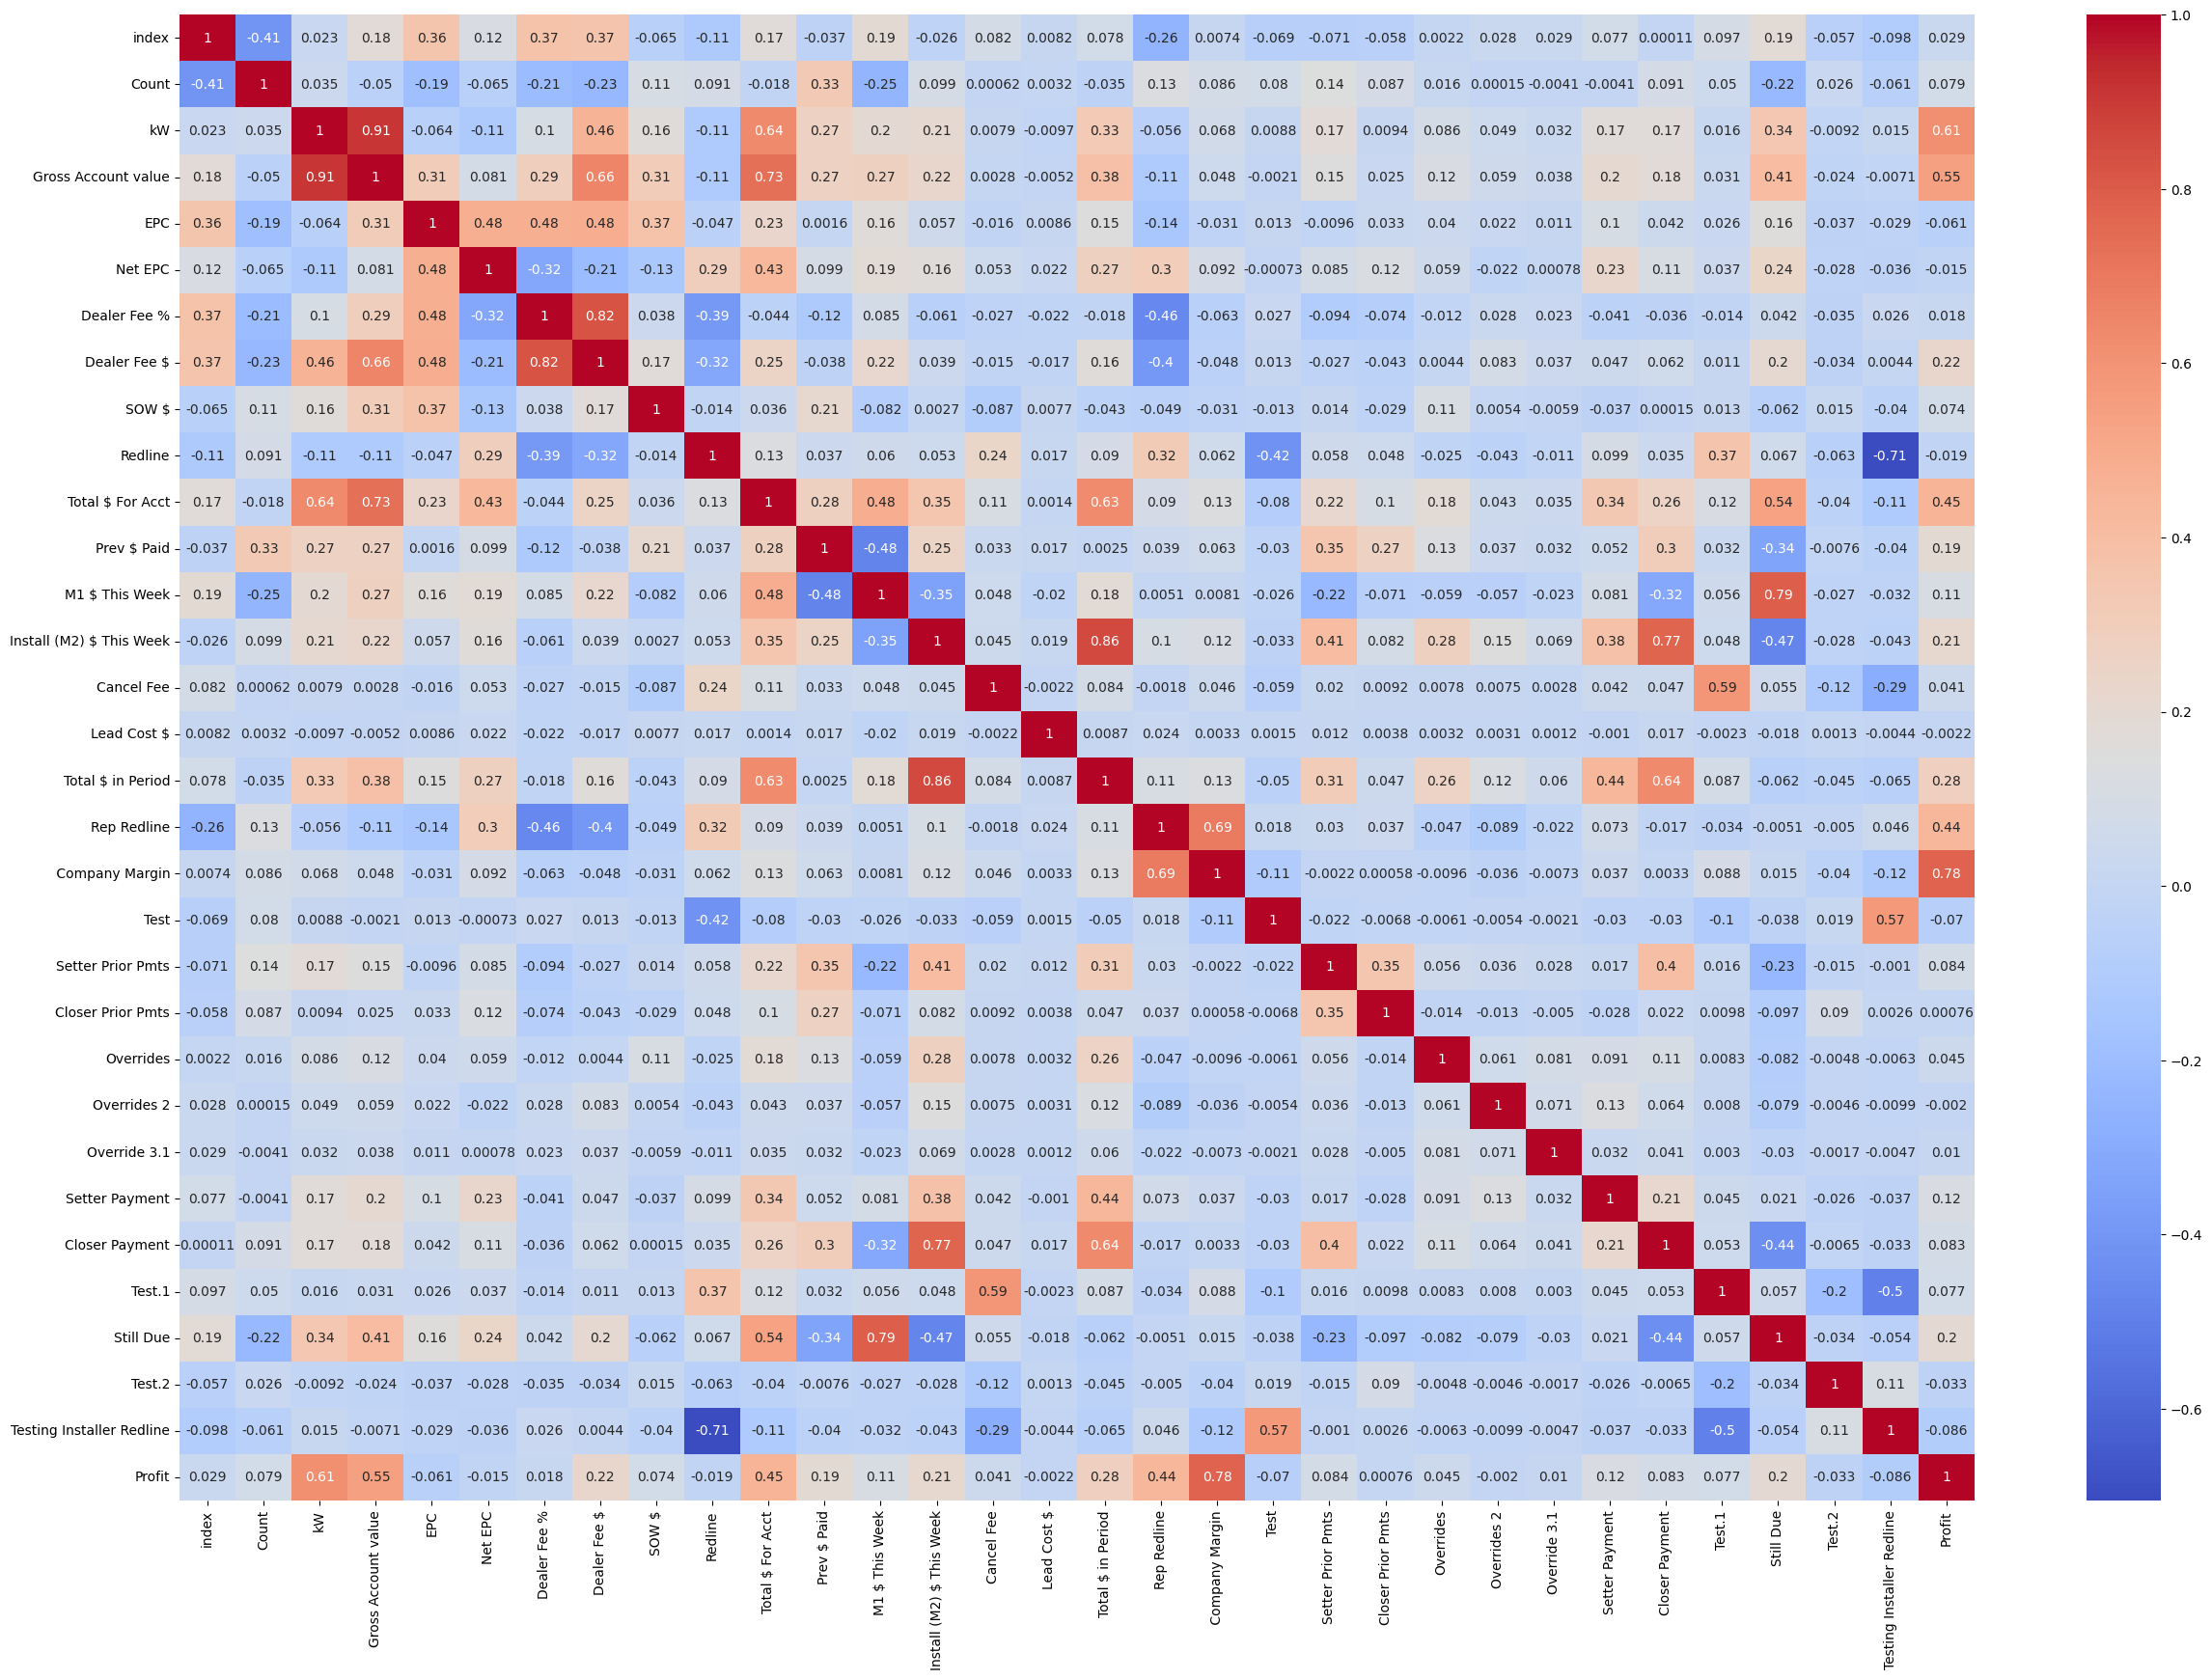

In [85]:
plt.figure(figsize=(30,20))
sns.heatmap(matrix,annot=True,cmap="coolwarm")

In [88]:
train = train[['kW','Gross Account value','Dealer Fee $','Total $ For Acct','Prev $ Paid','M1 $ This Week','Install (M2) $ This Week','Total $ in Period','Rep Redline',' Company Margin','Setter Payment','Still Due']]

In [90]:
labels = data['Profit']

In [91]:
x_train,x_test,y_train,y_test = train_test_split(train,labels)

In [92]:
regressor1 = regressor.fit(x_train,y_train)

In [93]:
pred1 = regressor1.predict(x_test)

In [94]:
mse = mean_squared_error(y_test,pred1)

In [95]:
mse

107877.96017259263

In [106]:
col = x_train.columns
col_arr = ['kW', 'Gross Account value', 'Dealer Fee $', 'Total $ For Acct',
       'Prev $ Paid', 'M1 $ This Week', 'Install (M2) $ This Week',
       'Total $ in Period', 'Rep Redline', ' Company Margin', 'Setter Payment',
       'Still Due']

In [109]:
def normalization(data,col_arr):
    for x in col_arr:
        mean = data[x].mean()
        data[x] -= mean
        std = data[x].std()
        data[x] /= std
    return data

In [110]:
def normalization_S(data):
    mean = data.mean()
    data -= mean
    std = data.std()
    data /= std
    return data

In [111]:
x_train= normalization(x_train,col)
x_test = normalization(x_test,col)
y_train = normalization_S(y_train)
y_test = normalization_S(y_test)

In [115]:
callbacks = [keras.callbacks.TensorBoard(log_dir='./logs',histogram_freq=1,update_freq=1),
             keras.callbacks.EarlyStopping(monitor='mse',patience=3)]

In [165]:
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_shape=(12,)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1))

model1.compile(optimizer='adam',loss='mse',metrics=['mse'])
history = model1.fit(x_train,y_train,epochs=50,callbacks=callbacks)

Epoch 1/50


2023-11-08 12:47:28.935747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 2s 23ms/step - loss: 0.3305 - mse: 0.3305
Epoch 2/50
27/27 [==============================] - 0s 7ms/step - loss: 0.1499 - mse: 0.1499
Epoch 3/50
27/27 [==============================] - 0s 8ms/step - loss: 0.1033 - mse: 0.1033
Epoch 4/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0853 - mse: 0.0853
Epoch 5/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0814 - mse: 0.0814
Epoch 6/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0764 - mse: 0.0764
Epoch 7/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0784 - mse: 0.0784
Epoch 8/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0826 - mse: 0.0826
Epoch 9/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0754 - mse: 0.0754
Epoch 10/50
27/27 [==============================] - 0s 7ms/step - loss: 0.1247 - mse: 0.1247
Epoch 11/50
27/27 [==============================] - 0s 7ms/step - loss: 0.1060

In [166]:
pred3 = model1.evaluate(x_train,y_train)

2023-11-08 12:47:32.655747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 6ms/step - loss: 0.0705 - mse: 0.0705


In [167]:
pred4 = model1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 14ms/step - loss: 0.1173 - mse: 0.1173


In [168]:
pred3

[0.07052821666002274, 0.07052821666002274]

In [169]:
pred4

[0.11726510524749756, 0.11726510524749756]

In [170]:
pred_final = model1.predict(x_test)

9/9 [==============================] - 0s 5ms/step


2023-11-08 12:47:33.256844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [171]:
# col_arr = ['Redline','Testing Installer Redline']
# def denormaization(old_data,data,col_arr):
#     for x in col_arr:
#         std = old_data[x].std()
#         data[x] * std
#         mean = old_data[x].mean()
#         data[x] += mean
#     return data

In [172]:
# denormaization(train,pred_final,col_arr)

In [173]:
# std = data['Profit'].std()
# mean = data['Profit'].mean()
# pred_final *= std
# pred_final += mean

In [174]:
accuracy = r2_score(y_test,pred_final)

In [175]:
accuracy

0.8823130721505869

In [176]:
mean_squared_error(y_test,pred_final)

0.11726511090371634

# MSE = 0.117
# ACCURACY = 88 %

In [178]:
train2 = train[['kW','Gross Account value','Total $ For Acct','Rep Redline',' Company Margin']]

In [187]:
x_train,x_test,y_train,y_test = train_test_split(train2,labels)

In [188]:
col = x_train.columns
col_arr = ['kW', 'Gross Account value', 'Dealer Fee $', 'Total $ For Acct',
       'Prev $ Paid', 'M1 $ This Week', 'Install (M2) $ This Week',
       'Total $ in Period', 'Rep Redline', ' Company Margin', 'Setter Payment',
       'Still Due']

In [189]:
x_train= normalization(x_train,col)
x_test = normalization(x_test,col)
y_train = normalization_S(y_train)
y_test = normalization_S(y_test)

In [194]:
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_shape=(5,)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mse',metrics=['mse'])
history = model2.fit(x_train,y_train,epochs=50,callbacks=callbacks)

Epoch 1/50


2023-11-08 12:58:00.190327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 2s 32ms/step - loss: 0.4465 - mse: 0.4465
Epoch 2/50
27/27 [==============================] - 0s 7ms/step - loss: 0.1378 - mse: 0.1378
Epoch 3/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0948 - mse: 0.0948
Epoch 4/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0890 - mse: 0.0890
Epoch 5/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0880 - mse: 0.0880
Epoch 6/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0924 - mse: 0.0924
Epoch 7/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0988 - mse: 0.0988
Epoch 8/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0871 - mse: 0.0871
Epoch 9/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0925 - mse: 0.0925
Epoch 10/50
27/27 [==============================] - 0s 8ms/step - loss: 0.1016 - mse: 0.1016
Epoch 11/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0910

In [195]:
pred_final_2 = model2.predict(x_test)
accuracy2 = r2_score(y_test,pred_final_2)
mse2 = mean_squared_error(y_test,pred_final_2)

9/9 [==============================] - 0s 9ms/step


2023-11-08 12:58:11.248767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [196]:
accuracy2

0.9155231660634994

In [198]:
mse2

0.08417404958547377

## MSE = 0.08
## ACCURACY = 91 %